# Twitter Financial News Sentiment - Sentiment Classification

## Data Description

- Idea here is to leverage external dataset from similar domain to see if performance of a model improves.
- I found Twitter Financial News Sentiment Dataset from HuggingFace.
- Stats, 
    - The dataset holds __11,932 documents__ annotated with 3 labels:
    - Sentiments: __Bearish, Bullish, Neutral__
- I've __hypothesize__ that Bearish correlates to Negative Sentiment & Bullish correlates to Positive Sentiment. 
- So after dropping documents with Neutral label from the dataset and mapping Bearish to Negative as well as Bullish to Positive class,
    - No. of __Negative__ Samples - __1442__
    - No. of __Positive__ Samples - __1922__
- In a nutshell, There are total __3365 samples__ after clearning and preprocessing.

Reference - https://huggingface.co/datasets/zeroshot/twitter-financial-news-sentiment

## Data Exploration, Preprocessing & Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
import re
import string
import json
from spacy.lang.en.stop_words import STOP_WORDS

C:\Users\darsh\anaconda3\envs\reddit_sentiment_cls\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Loading Dataset

In [3]:
data_df = pd.read_csv("../data/twitter-financial-news-sentiment/sent_train.csv")
data_df

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0
...,...,...
9538,The Week's Gainers and Losers on the Stoxx Eur...,2
9539,Tupperware Brands among consumer gainers; Unil...,2
9540,vTv Therapeutics leads healthcare gainers; Myo...,2
9541,"WORK, XPO, PYX and AMKR among after hour movers",2


In [4]:
data_df.rename(columns={"label": "class"}, inplace=True)
data_df

,text,class
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0
...,...,...
9538,The Week's Gainers and Losers on the Stoxx Eur...,2
9539,Tupperware Brands among consumer gainers; Unil...,2
9540,vTv Therapeutics leads healthcare gainers; Myo...,2
9541,"WORK, XPO, PYX and AMKR among after hour movers",2


In [5]:
data_df = data_df[~(data_df["class"] == 2)].copy(deep=True)
data_df

,text,class
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0
...,...,...
9470,Why Slack Stock Just Surged 17%,1
9471,Why Tiffany Stock Just Popped 6%,1
9472,WiLAN signs wireless license with LG; shares +...,1
9473,"Yandex authorizes share repurchase program, sh...",1


In [6]:
data_df['sentiment'] = np.where(data_df['class'] == 0, "Negative", "Positive")
data_df

,text,class,sentiment
0,$BYND - JPMorgan reels in expectations on Beyo...,0,Negative
1,$CCL $RCL - Nomura points to bookings weakness...,0,Negative
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,Negative
3,$ESS: BTIG Research cuts to Neutral https://t....,0,Negative
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,Negative
...,...,...,...
9470,Why Slack Stock Just Surged 17%,1,Positive
9471,Why Tiffany Stock Just Popped 6%,1,Positive
9472,WiLAN signs wireless license with LG; shares +...,1,Positive
9473,"Yandex authorizes share repurchase program, sh...",1,Positive


In [7]:
data_df['text_len'] = data_df['text'].apply(lambda x: len(x))
data_df

,text,class,sentiment,text_len
0,$BYND - JPMorgan reels in expectations on Beyo...,0,Negative,77
1,$CCL $RCL - Nomura points to bookings weakness...,0,Negative,102
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,Negative,94
3,$ESS: BTIG Research cuts to Neutral https://t....,0,Negative,59
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,Negative,71
...,...,...,...,...
9470,Why Slack Stock Just Surged 17%,1,Positive,31
9471,Why Tiffany Stock Just Popped 6%,1,Positive,32
9472,WiLAN signs wireless license with LG; shares +...,1,Positive,51
9473,"Yandex authorizes share repurchase program, sh...",1,Positive,66


In [8]:
data_df.isna().sum()

text         0
class        0
sentiment    0
text_len     0
dtype: int64

In [9]:
duplicate_data_df = data_df[data_df.duplicated(subset = ['text','sentiment'])]
duplicate_data_df

,text,class,sentiment,text_len


In [10]:
data_df = data_df.drop(labels=list(duplicate_data_df.index), axis=0)
data_df

,text,class,sentiment,text_len
0,$BYND - JPMorgan reels in expectations on Beyo...,0,Negative,77
1,$CCL $RCL - Nomura points to bookings weakness...,0,Negative,102
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,Negative,94
3,$ESS: BTIG Research cuts to Neutral https://t....,0,Negative,59
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,Negative,71
...,...,...,...,...
9470,Why Slack Stock Just Surged 17%,1,Positive,31
9471,Why Tiffany Stock Just Popped 6%,1,Positive,32
9472,WiLAN signs wireless license with LG; shares +...,1,Positive,51
9473,"Yandex authorizes share repurchase program, sh...",1,Positive,66


In [11]:
data_df.describe()

,class,text_len
count,3365.000000,3365.00000
mean,0.571471,81.63893
std,0.494939,32.63249
min,0.000000,9.00000
25%,0.000000,57.00000
50%,1.000000,74.00000
75%,1.000000,106.00000
max,1.000000,154.00000


In [12]:
data_df['sentiment'].value_counts()

Positive    1923
Negative    1442
Name: sentiment, dtype: int64

## Cleaning & Preprocessing

In [13]:
def lower_case(text):
    return text.lower()

In [14]:
PUNCT_TO_REMOVE = string.punctuation
print(PUNCT_TO_REMOVE)
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [15]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOP_WORDS])

In [16]:
EMOTICONS = {}
with open("emoticons.json", "r") as fp:
    EMOTICONS = json.load(fp)

In [17]:
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

In [18]:
EMOJIS = {}
with open("emojis.json", "r") as fp:
    EMOJIS = json.load(fp)

In [19]:
def convert_emojis(text):
    for emot in EMOJIS:
        text = re.sub(r'('+emot+')', "_".join(EMOJIS[emot].replace(",","").replace(":","").split()), text)
    return text

In [20]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [21]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [22]:
CHAT_WRODS = {}
with open("emojis.json", "r") as fp:
    CHAT_WORDS = json.load(fp)
CHAT_WORDS_LIST = set(CHAT_WORDS.keys())

In [23]:
def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in CHAT_WORDS_LIST:
            new_text.append(CHAT_WORDS[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [24]:
from spellchecker import SpellChecker
spell = SpellChecker()

In [25]:
data_df["processed_text"] = data_df["text"].astype(str).apply(lambda text: lower_case(text))
data_df["processed_text"] = data_df["processed_text"].apply(lambda text: remove_punctuation(text))
data_df["processed_text"] = data_df["processed_text"].apply(lambda text: remove_stopwords(text))
data_df["processed_text"] = data_df["processed_text"].apply(lambda text: convert_emoticons(text))
data_df["processed_text"] = data_df["processed_text"].apply(lambda text: convert_emojis(text))
data_df["processed_text"] = data_df["processed_text"].apply(lambda text: remove_urls(text))
data_df["processed_text"] = data_df["processed_text"].apply(lambda text: remove_html(text))
data_df["processed_text"] = data_df["processed_text"].apply(lambda text: chat_words_conversion(text))

In [26]:
data_df

,text,class,sentiment,text_len,processed_text
0,$BYND - JPMorgan reels in expectations on Beyo...,0,Negative,77,bynd jpmorgan reels expectations meat httpstco...
1,$CCL $RCL - Nomura points to bookings weakness...,0,Negative,102,ccl rcl nomura points bookings weakness carniv...
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,Negative,94,cx cemex cut credit suisse jp morgan weak buil...
3,$ESS: BTIG Research cuts to Neutral https://t....,0,Negative,59,ess btig research cuts neutral httpstcomcyftsxc2n
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,Negative,71,fnko funko slides piper jaffray pt cut httpstc...
...,...,...,...,...,...
9470,Why Slack Stock Just Surged 17%,1,Positive,31,slack stock surged 17
9471,Why Tiffany Stock Just Popped 6%,1,Positive,32,tiffany stock popped 6
9472,WiLAN signs wireless license with LG; shares +...,1,Positive,51,wilan signs wireless license lg shares 7 pm
9473,"Yandex authorizes share repurchase program, sh...",1,Positive,66,yandex authorizes share repurchase program sha...


In [27]:
data_df["processed_text_len"] = data_df['processed_text'].apply(lambda x: len(x))
data_df

,text,class,sentiment,text_len,processed_text,processed_text_len
0,$BYND - JPMorgan reels in expectations on Beyo...,0,Negative,77,bynd jpmorgan reels expectations meat httpstco...,56
1,$CCL $RCL - Nomura points to bookings weakness...,0,Negative,102,ccl rcl nomura points bookings weakness carniv...,83
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,Negative,94,cx cemex cut credit suisse jp morgan weak buil...,77
3,$ESS: BTIG Research cuts to Neutral https://t....,0,Negative,59,ess btig research cuts neutral httpstcomcyftsxc2n,49
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,Negative,71,fnko funko slides piper jaffray pt cut httpstc...,57
...,...,...,...,...,...,...
9470,Why Slack Stock Just Surged 17%,1,Positive,31,slack stock surged 17,21
9471,Why Tiffany Stock Just Popped 6%,1,Positive,32,tiffany stock popped 6,22
9472,WiLAN signs wireless license with LG; shares +...,1,Positive,51,wilan signs wireless license lg shares 7 pm,43
9473,"Yandex authorizes share repurchase program, sh...",1,Positive,66,yandex authorizes share repurchase program sha...,61


In [28]:
data_df.describe()

,class,text_len,processed_text_len
count,3365.000000,3365.00000,3365.000000
mean,0.571471,81.63893,64.697177
std,0.494939,32.63249,25.167964
min,0.000000,9.00000,2.000000
25%,0.000000,57.00000,46.000000
50%,1.000000,74.00000,60.000000
75%,1.000000,106.00000,83.000000
max,1.000000,154.00000,132.000000


In [29]:
data_df[data_df["processed_text_len"] <= 10]

,text,class,sentiment,text_len,processed_text,processed_text_len
3090,Brent +4%,1,Positive,9,brent 4,7
6681,S&P 500 and Down down 0.1%,0,Negative,26,sp 500 01,9
6849,Nasdaq up 0.2%,1,Positive,14,nasdaq 02,9
7699,$ZM here we go..... down....,0,Negative,28,zm,2
7934,$WTRH back over $1,1,Positive,18,wtrh 1,6
7935,$WW heavy....,1,Positive,13,ww heavy,8
8055,Long $WMT,1,Positive,9,long wmt,8


## Highest/Lowest Frequent Words

In [30]:
from collections import Counter
cnt = Counter()
for text in data_df["processed_text"].values:
    for word in text.split():
        cnt[word] += 1

In [31]:
n_freq_words = 20
FREQWORDS = set([w for (w, wc) in cnt.most_common(n_freq_words)])
FREQWORDS

{'beats',
 'china',
 'coronavirus',
 'economy',
 'eps',
 'funds',
 'hedge',
 'market',
 'markets',
 'new',
 'oil',
 'price',
 'revenue',
 'sales',
 'says',
 'shares',
 'stock',
 'stocks',
 'target',
 'trade'}

In [32]:
n_rare_words = 20
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
RAREWORDS

{'6mo',
 'bharti',
 'bingeeating',
 'bulimia',
 'decor',
 'denies',
 'dows',
 'drives',
 'gainer',
 'httpstcook7cr4i2qj',
 'jks',
 'midstage',
 'unisyss',
 'unitedhealths',
 'vereit',
 'viasat',
 'viking',
 'virnetx',
 'vk2809',
 'vktx'}

## WordCloud

In [33]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [34]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    wordcloud = WordCloud(stopwords=STOP_WORDS, scale=4, max_font_size=50, max_words=100,mask=mask, background_color="black").generate(text)
    fig = plt.figure(1, figsize=(8,8))
    plt.axis('off')
    fig.suptitle(title, fontsize=10)
    fig.subplots_adjust(top=1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

### Overall Dataset

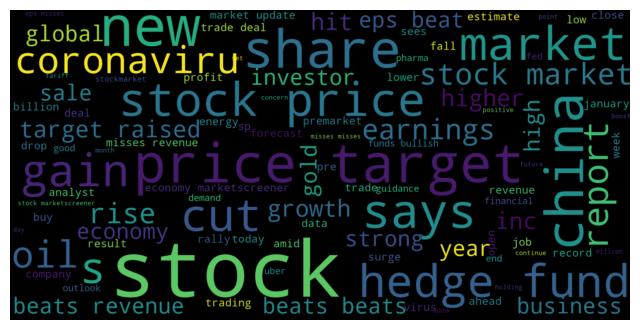

In [35]:
show_wordcloud(data_df['processed_text'], title = '')

### Positive Samples

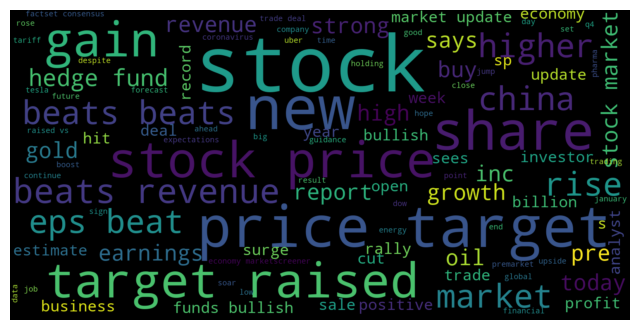

In [36]:
show_wordcloud(data_df[data_df['sentiment'] == 'Positive']['processed_text'], title = '')

### Negative Samples

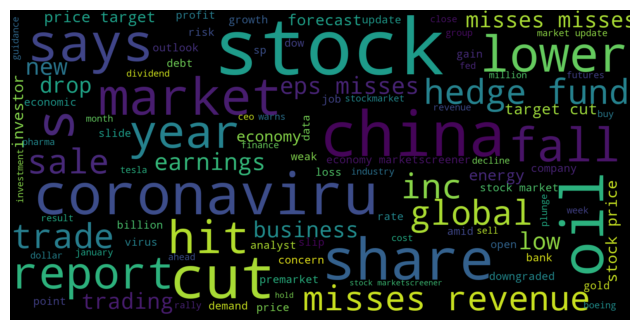

In [37]:
show_wordcloud(data_df[data_df['sentiment'] == 'Negative']['processed_text'], title = '') 

## Saving dataset on disk

In [38]:
data_df.columns

Index(['text', 'class', 'sentiment', 'text_len', 'processed_text',
       'processed_text_len'],
      dtype='object')

In [39]:
data_df[["class", "sentiment", "text", "processed_text"]].to_csv("../data/twitter-financial-news-sentiment/processed_dataset.csv", index=False)